In [1]:
import numpy as np
import zdm.analyze_cube as ac
import matplotlib.pyplot as plt
import zdm.analyze_cube as ac

## inspecting cubes

In [2]:
cube_dir  = "../CRACO/Cubes/craco_full_cube.npz"
cube_dir_real  ="./Cubes/craco_real_cube.npz"

cube=np.load(cube_dir)
cube_real=np.load(cube_dir_real)

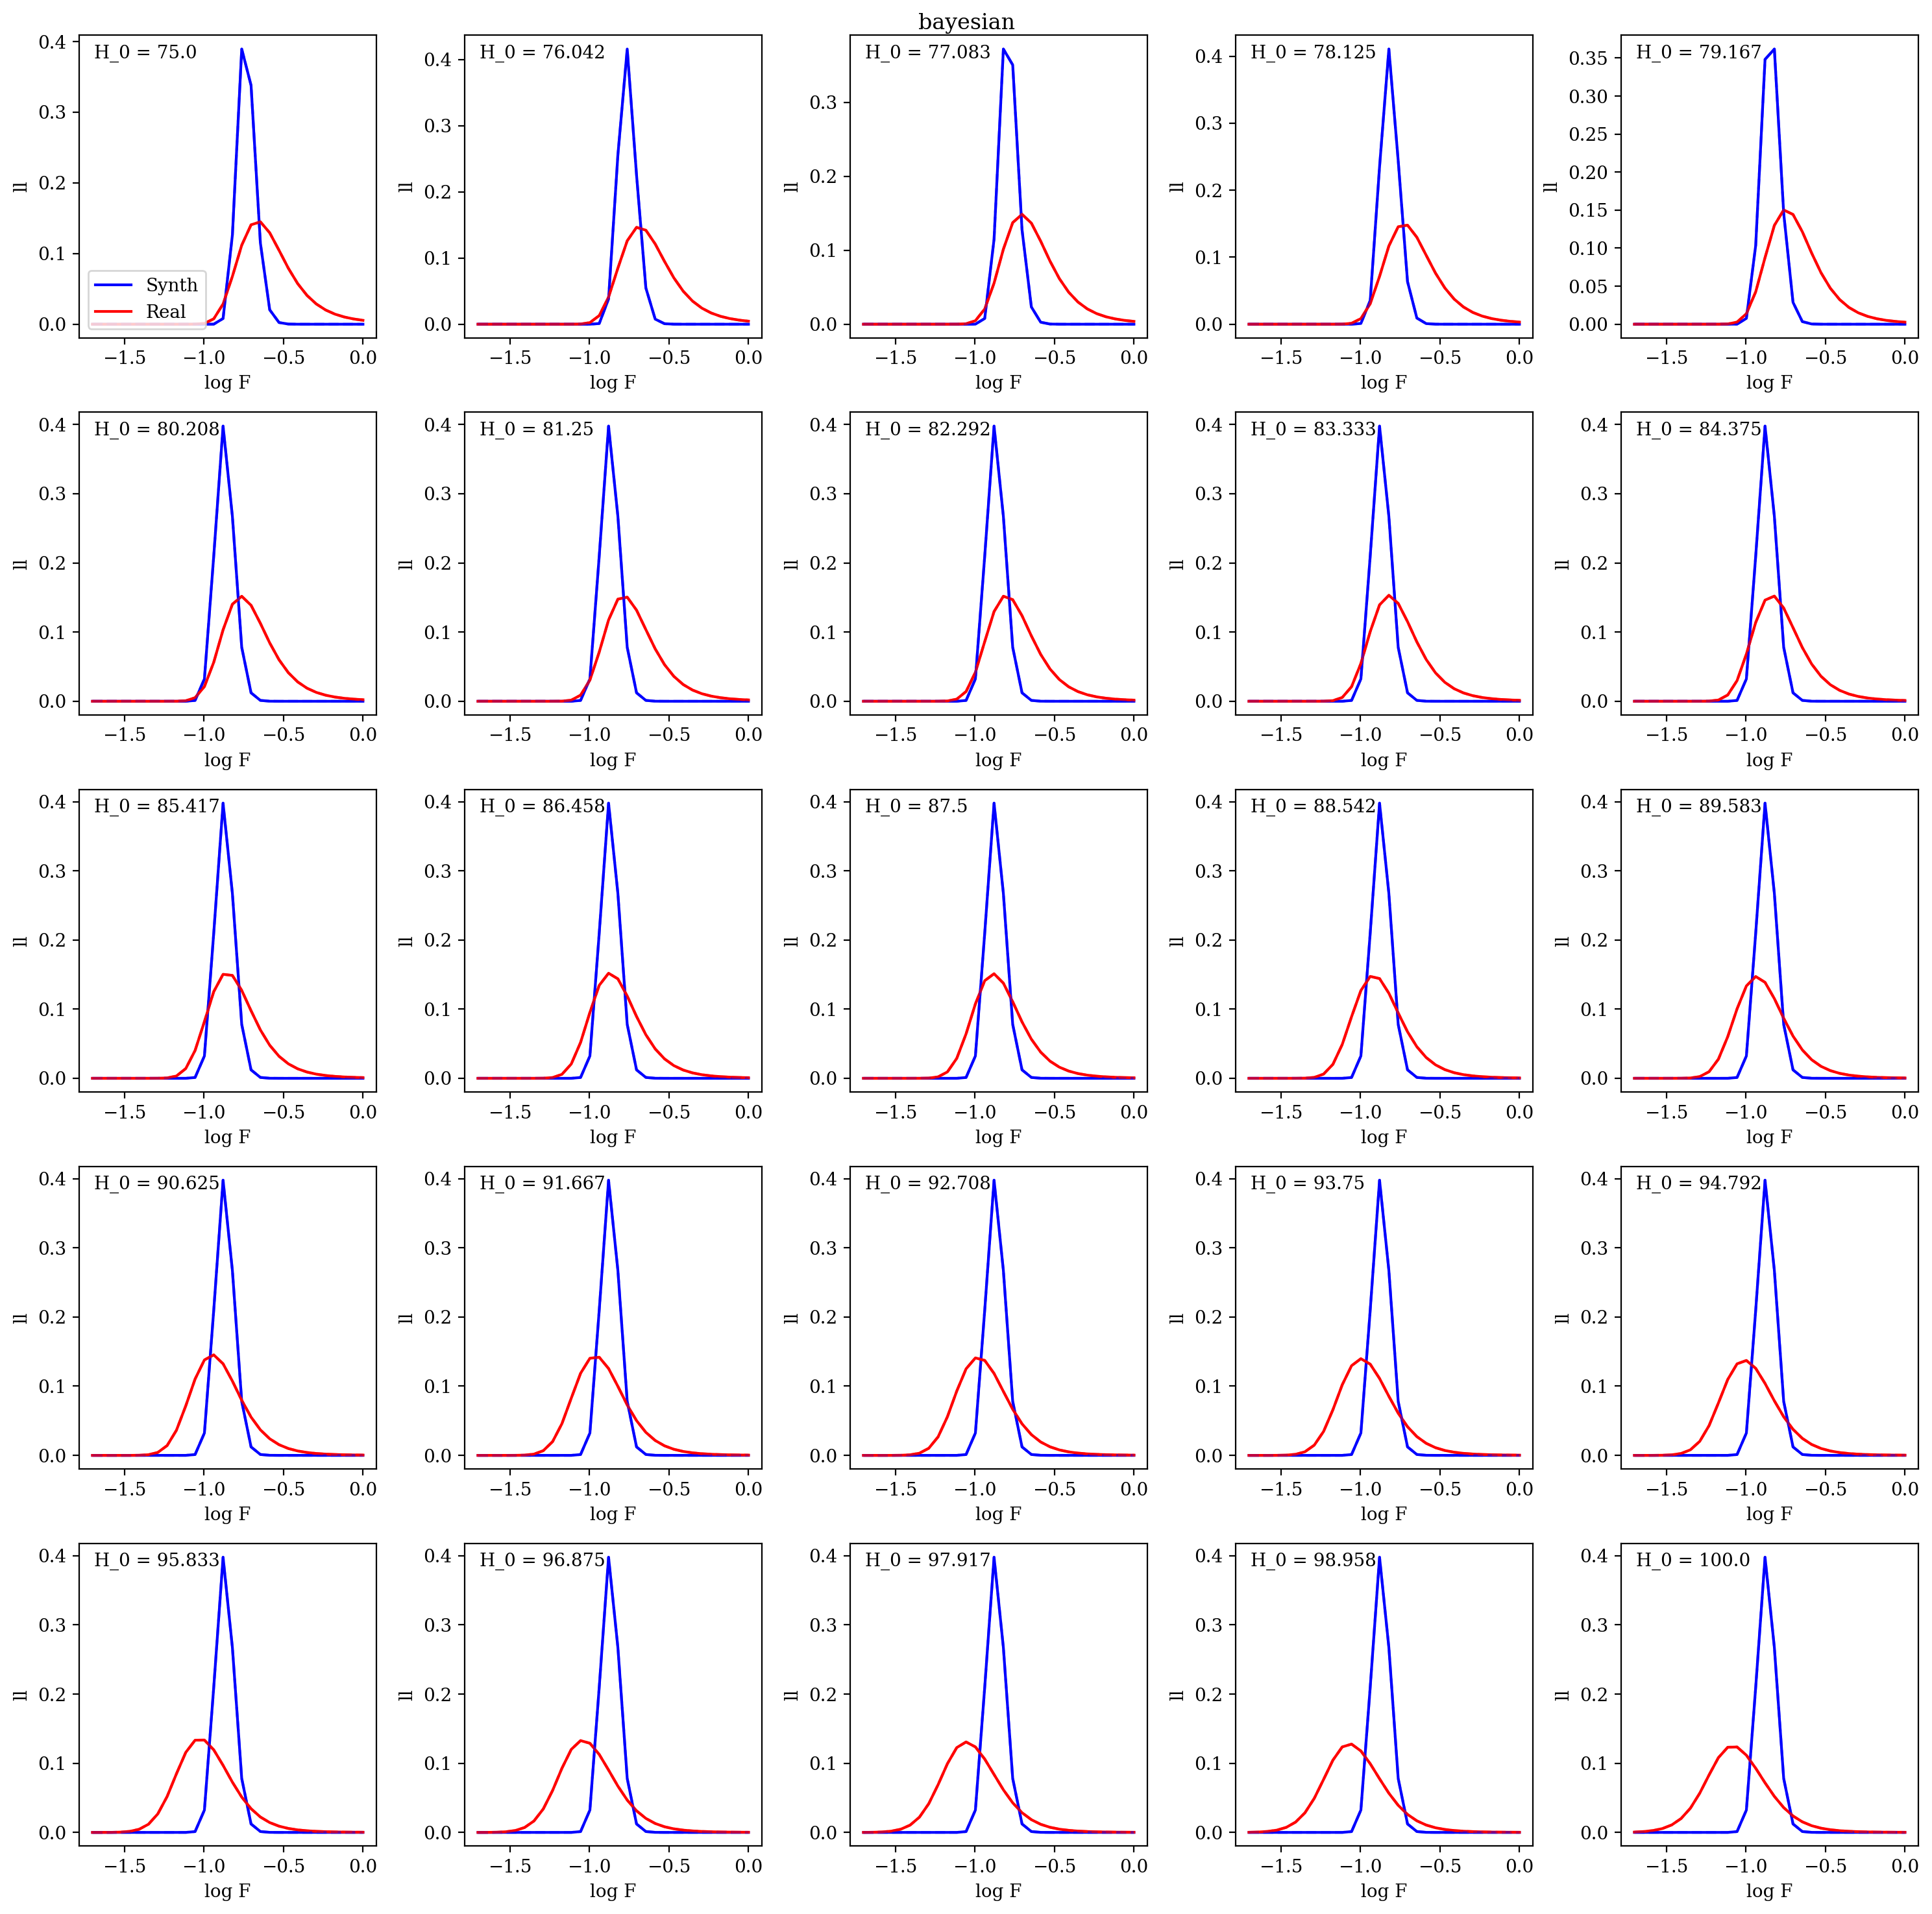

In [3]:
# Marginalization over H0
fig, ax = plt.subplots(5,5, dpi=200, figsize=(15,15))

H0s = np.linspace(75, 100, 25)

for H0, a in zip(H0s, ax.flatten()):
  ll = ac.get_slice_from_parameters(cube, ["H0", "lmean", "lsigma"], [H0, 2.16, .51], wanted="ll")
  ll_real = ac.get_slice_from_parameters(cube_real, ["H0", "lmean", "lsigma"], [H0, 2.16, .51], wanted="ll")

  
  _, vectors, _= ac.get_bayesian_data(ll)
  _, vectors_real, _ = ac.get_bayesian_data(ll_real)

  ll[np.isnan(ll)] = -1e99
  ll -= np.max(ll)
  ll = 10**ll
  ll /= np.sum(ll)
  ll_real[np.isnan(ll_real)] = -1e99
  ll_real -= np.max(ll_real)
  ll_real = 10**ll_real
  ll_real /= np.sum(ll_real)

  a.plot(cube["logF"], vectors[-1], c="b", label="Synth")
  a.plot(cube["logF"], vectors_real[-1], c="r", label="Real")  

  a.plot(cube["logF"], ll, c="b", ls='--', alpha=.5)
  a.plot(cube["logF"], ll_real, c="r", ls='--', alpha=.5)  

  a.set_xlabel("log F")
  a.set_ylabel("ll")
  a.text(.05, .925,f"H_0 = {np.round(H0,3)}", transform=a.transAxes)

  if H0 == H0s[0]:
    a.legend(loc="lower left")

fig.suptitle("bayesian")
fig.tight_layout()
plt.show()

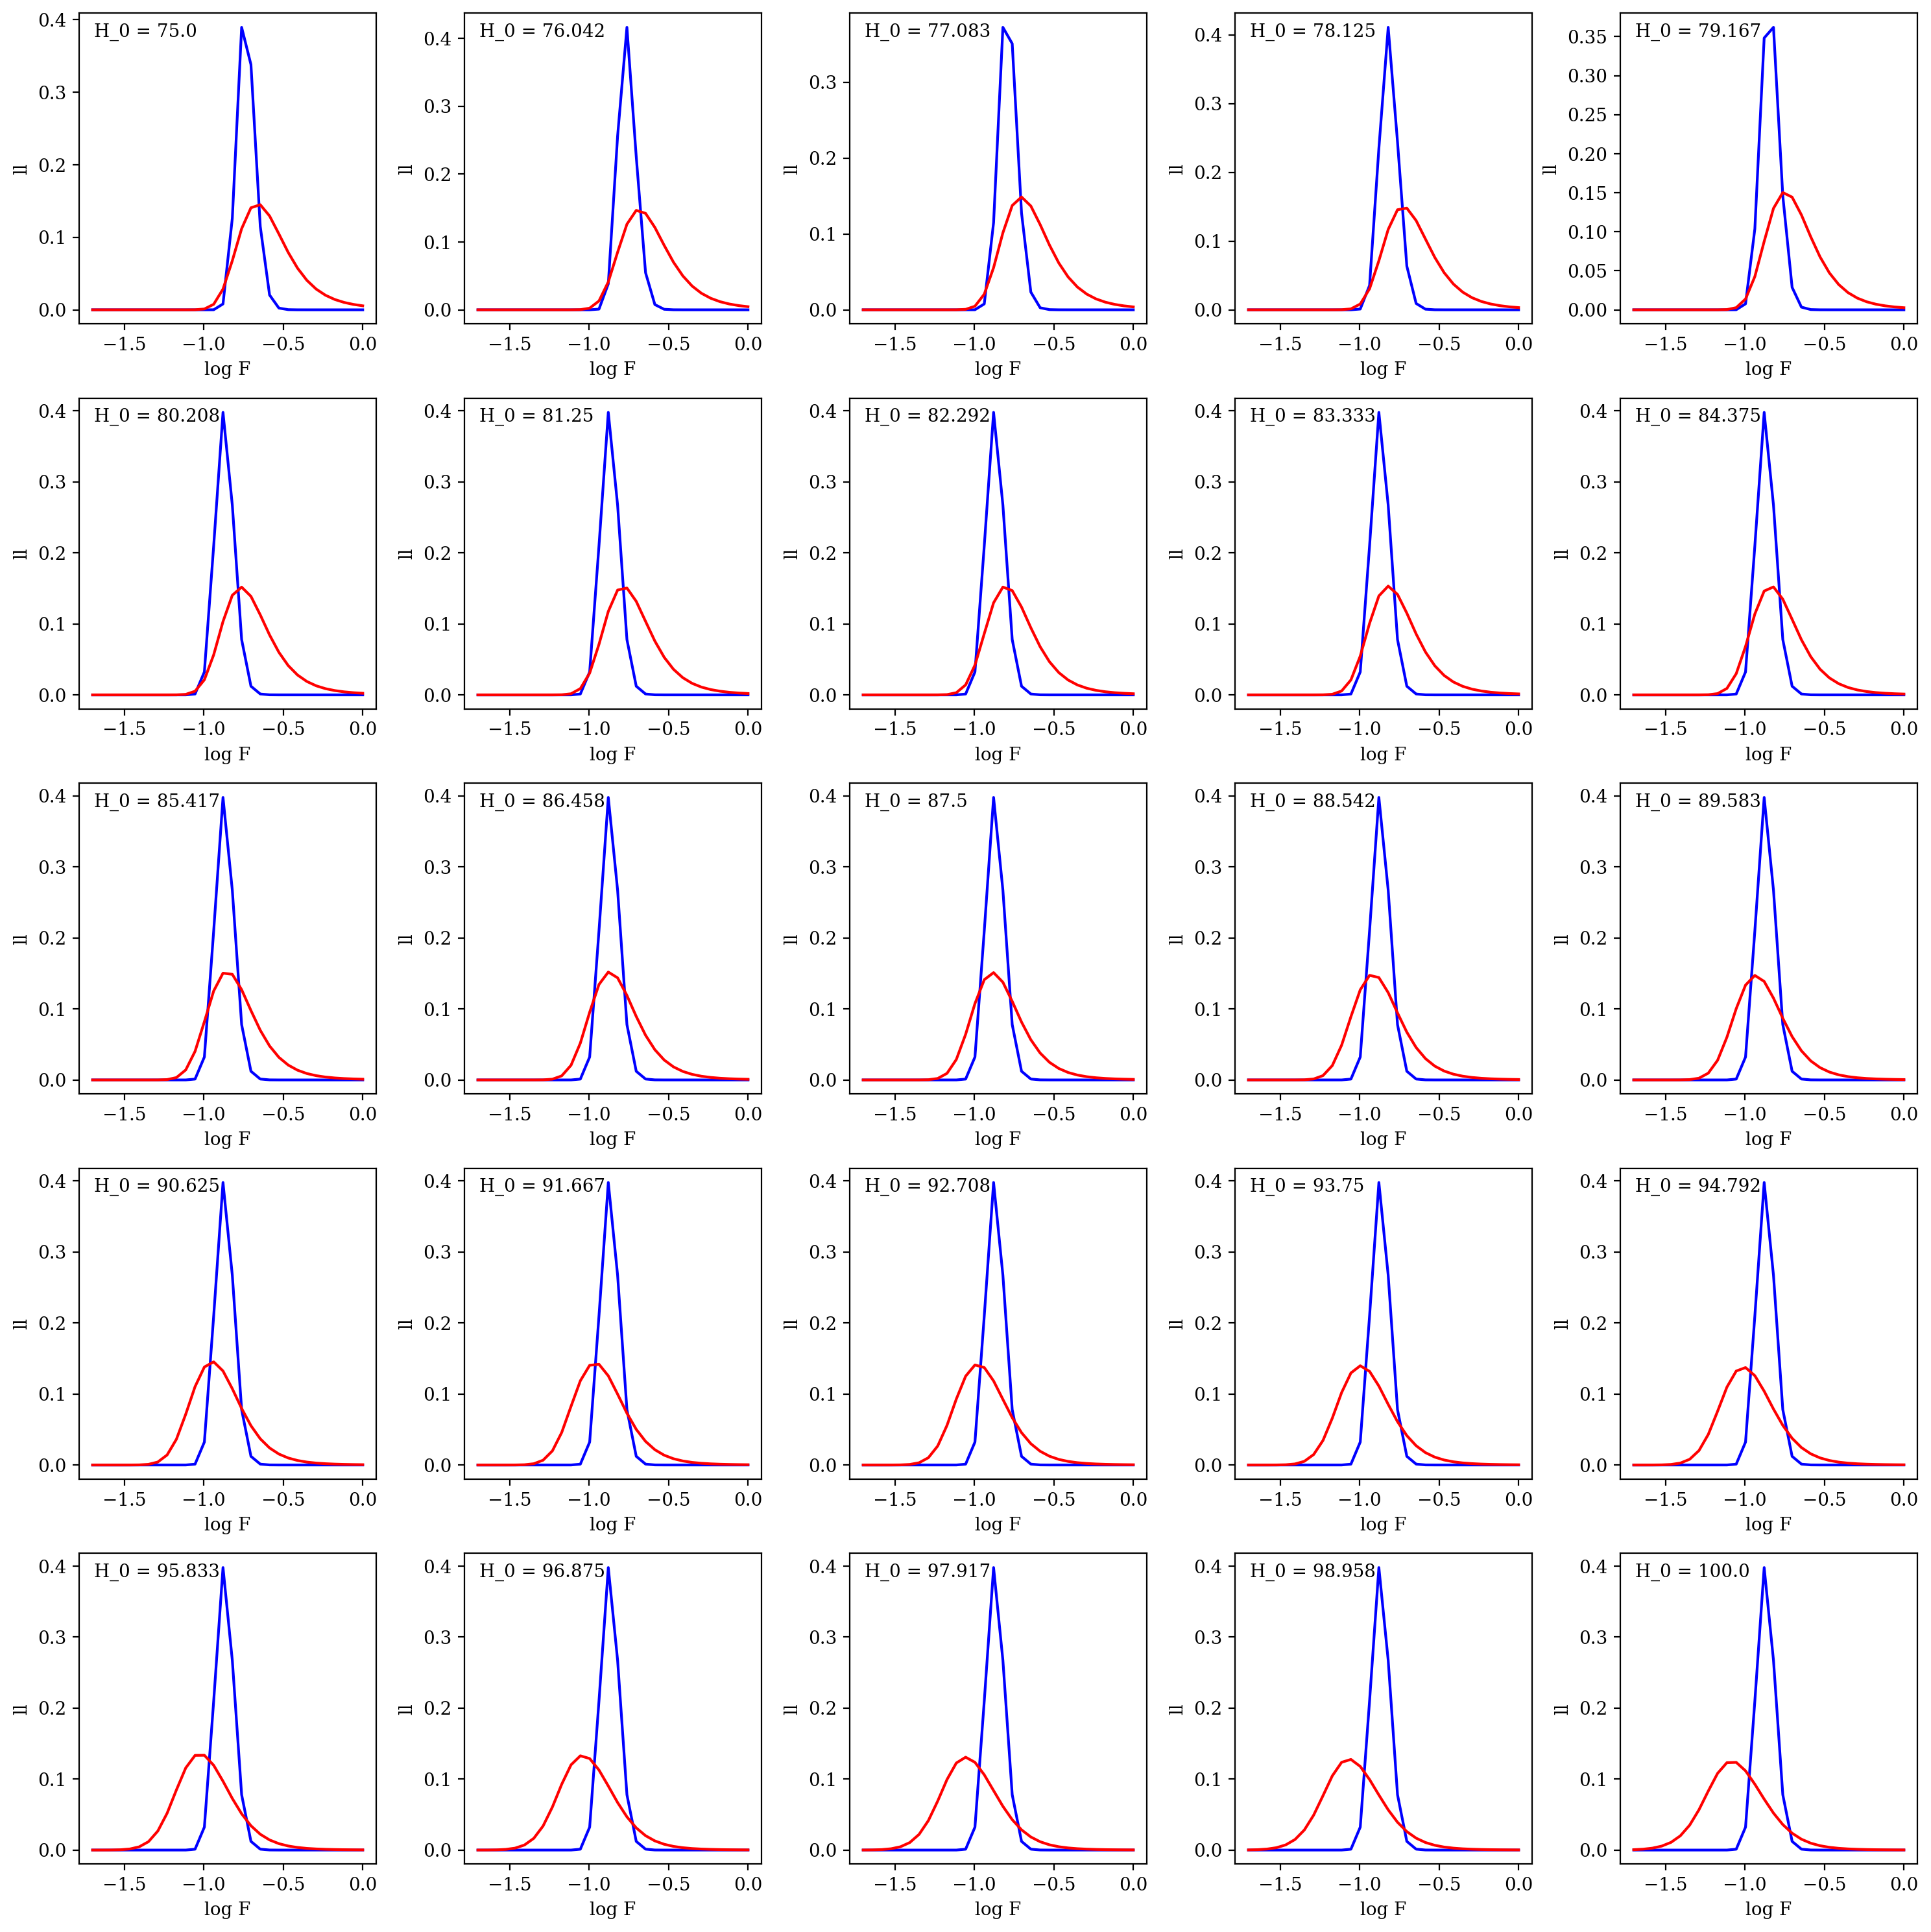

In [23]:
fig, ax = plt.subplots(5, 5, dpi=200, figsize=(15,15))

for H0, a in zip(H0s, ax.flatten()):
  ll = ac.get_slice_from_parameters(cube, ["H0", "lmean", "lsigma"], [H0, 2.16, .51], wanted="ll")

  ll[np.isnan(ll)] = -1e99
  ll -= np.max(ll)
  ll = 10**ll
  ll /= np.sum(ll)

  ll_real = ac.get_slice_from_parameters(cube_real, ["H0", "lmean", "lsigma"], [H0, 2.16, .51], wanted="ll")
  ll_real[np.isnan(ll_real)] = -1e99
  ll_real -= np.max(ll_real)
  ll_real = 10**ll_real
  ll_real /= np.sum(ll_real)

  a.plot(cube["logF"], ll, c="b")
  a.plot(cube["logF"], ll_real, c="r")
  
  a.set_xlabel("log F")
  a.set_ylabel("ll")
  a.text(.05, .925,f"H_0 = {np.round(H0,3)}", transform=a.transAxes)

fig.tight_layout()
plt.show()

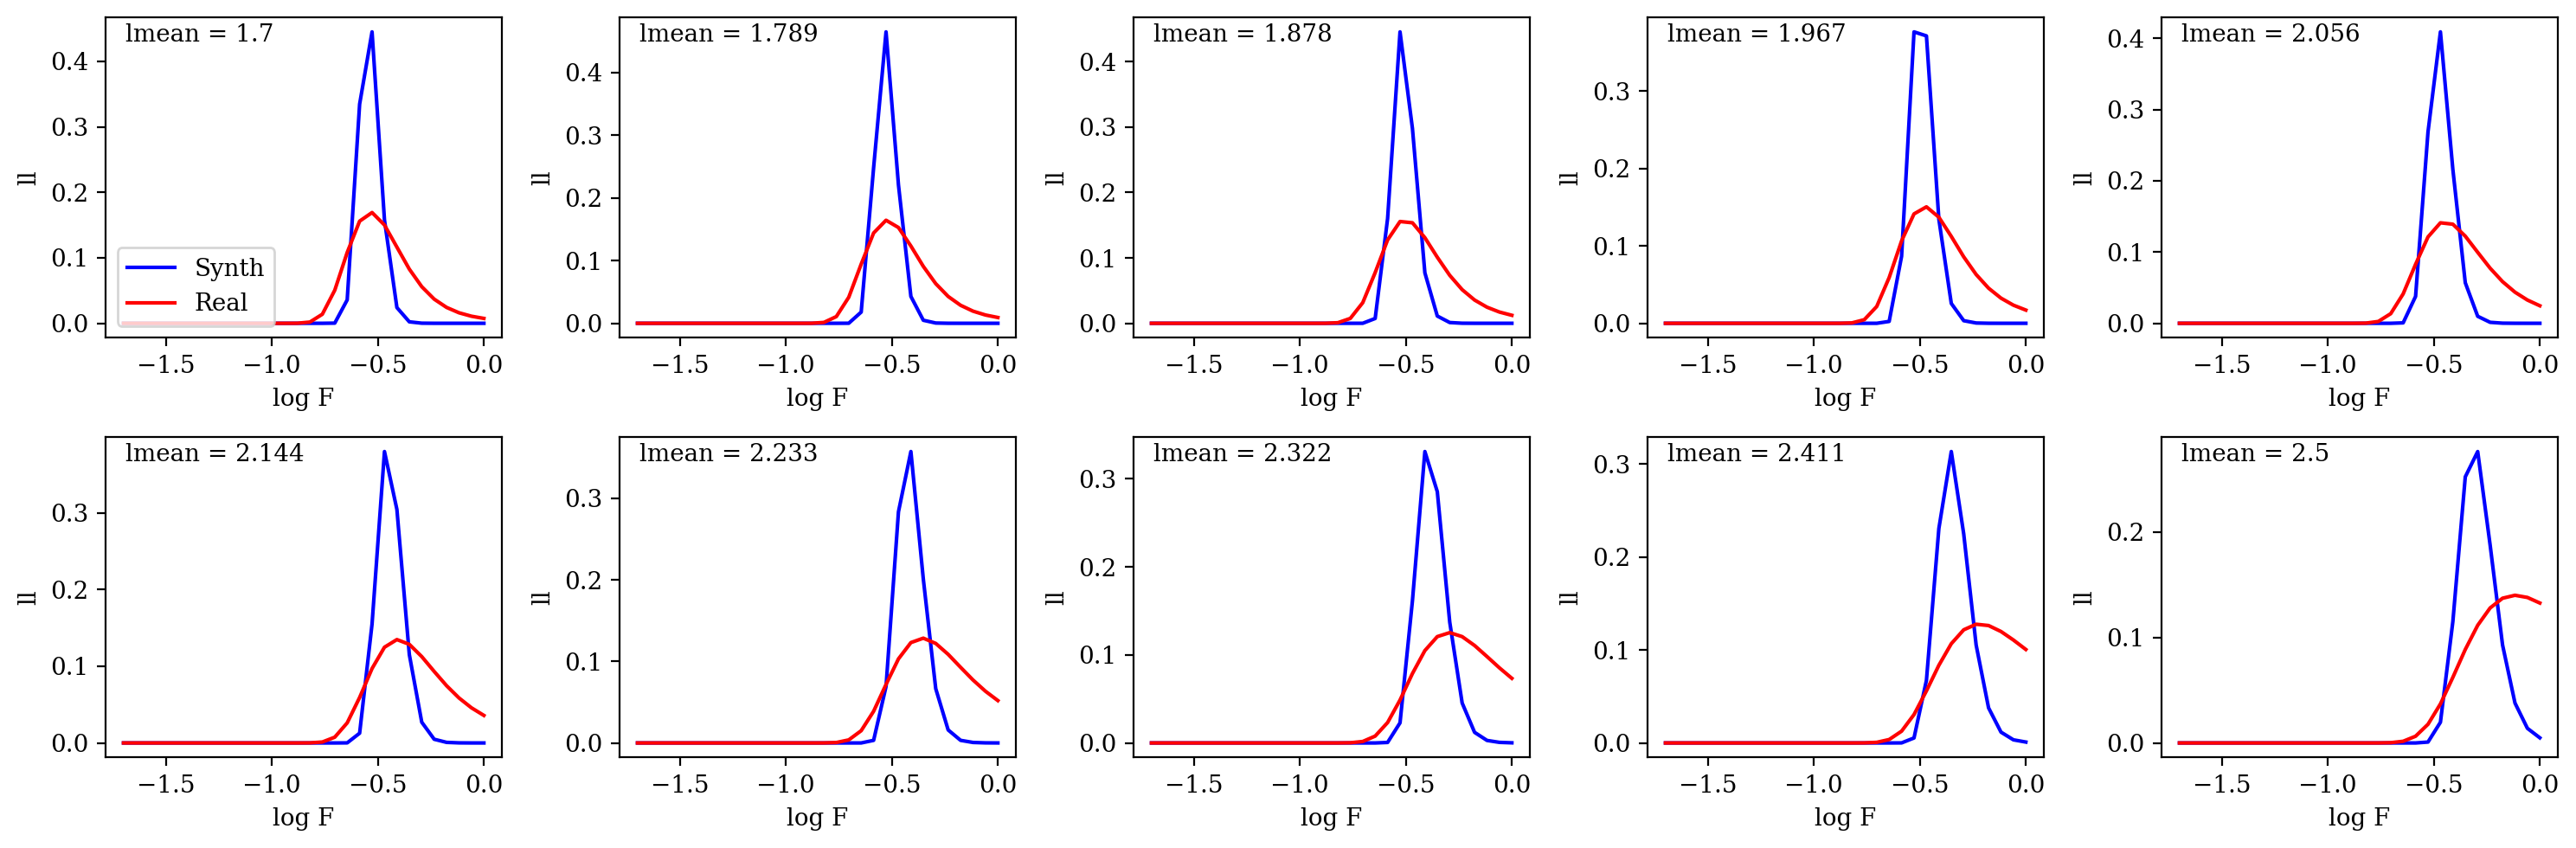

In [43]:
H0_diag = 65

lmeans = cube["lmean"]

fig, ax = plt.subplots(2, 5, dpi=200, figsize=(15,5))


for lmean, a in zip(lmeans, ax.flatten()):
  ll = ac.get_slice_from_parameters(cube, ["H0", "lmean", "lsigma"], [H0_diag, lmean, .51], wanted="ll")
  ll[np.isnan(ll)] = -1e99
  ll -= np.max(ll)
  ll = 10**ll
  ll /= np.sum(ll)

  ll_real = ac.get_slice_from_parameters(cube_real, ["H0", "lmean", "lsigma"], [H0_diag, lmean, .51], wanted="ll")
  ll_real[np.isnan(ll_real)] = -1e99
  ll_real -= np.max(ll_real)
  ll_real = 10**ll_real
  ll_real /= np.sum(ll_real)

  a.plot(cube["logF"], ll, c="b", label="Synth")
  a.plot(cube["logF"], ll_real, c="r", label="Real")
  
  a.set_xlabel("log F")
  a.set_ylabel("ll")
  a.text(.05, .925,f"lmean = {np.round(lmean,3)}", transform=a.transAxes)

  if lmean == lmeans[0]:
    a.legend(loc="lower left")

fig.tight_layout()
plt.show()

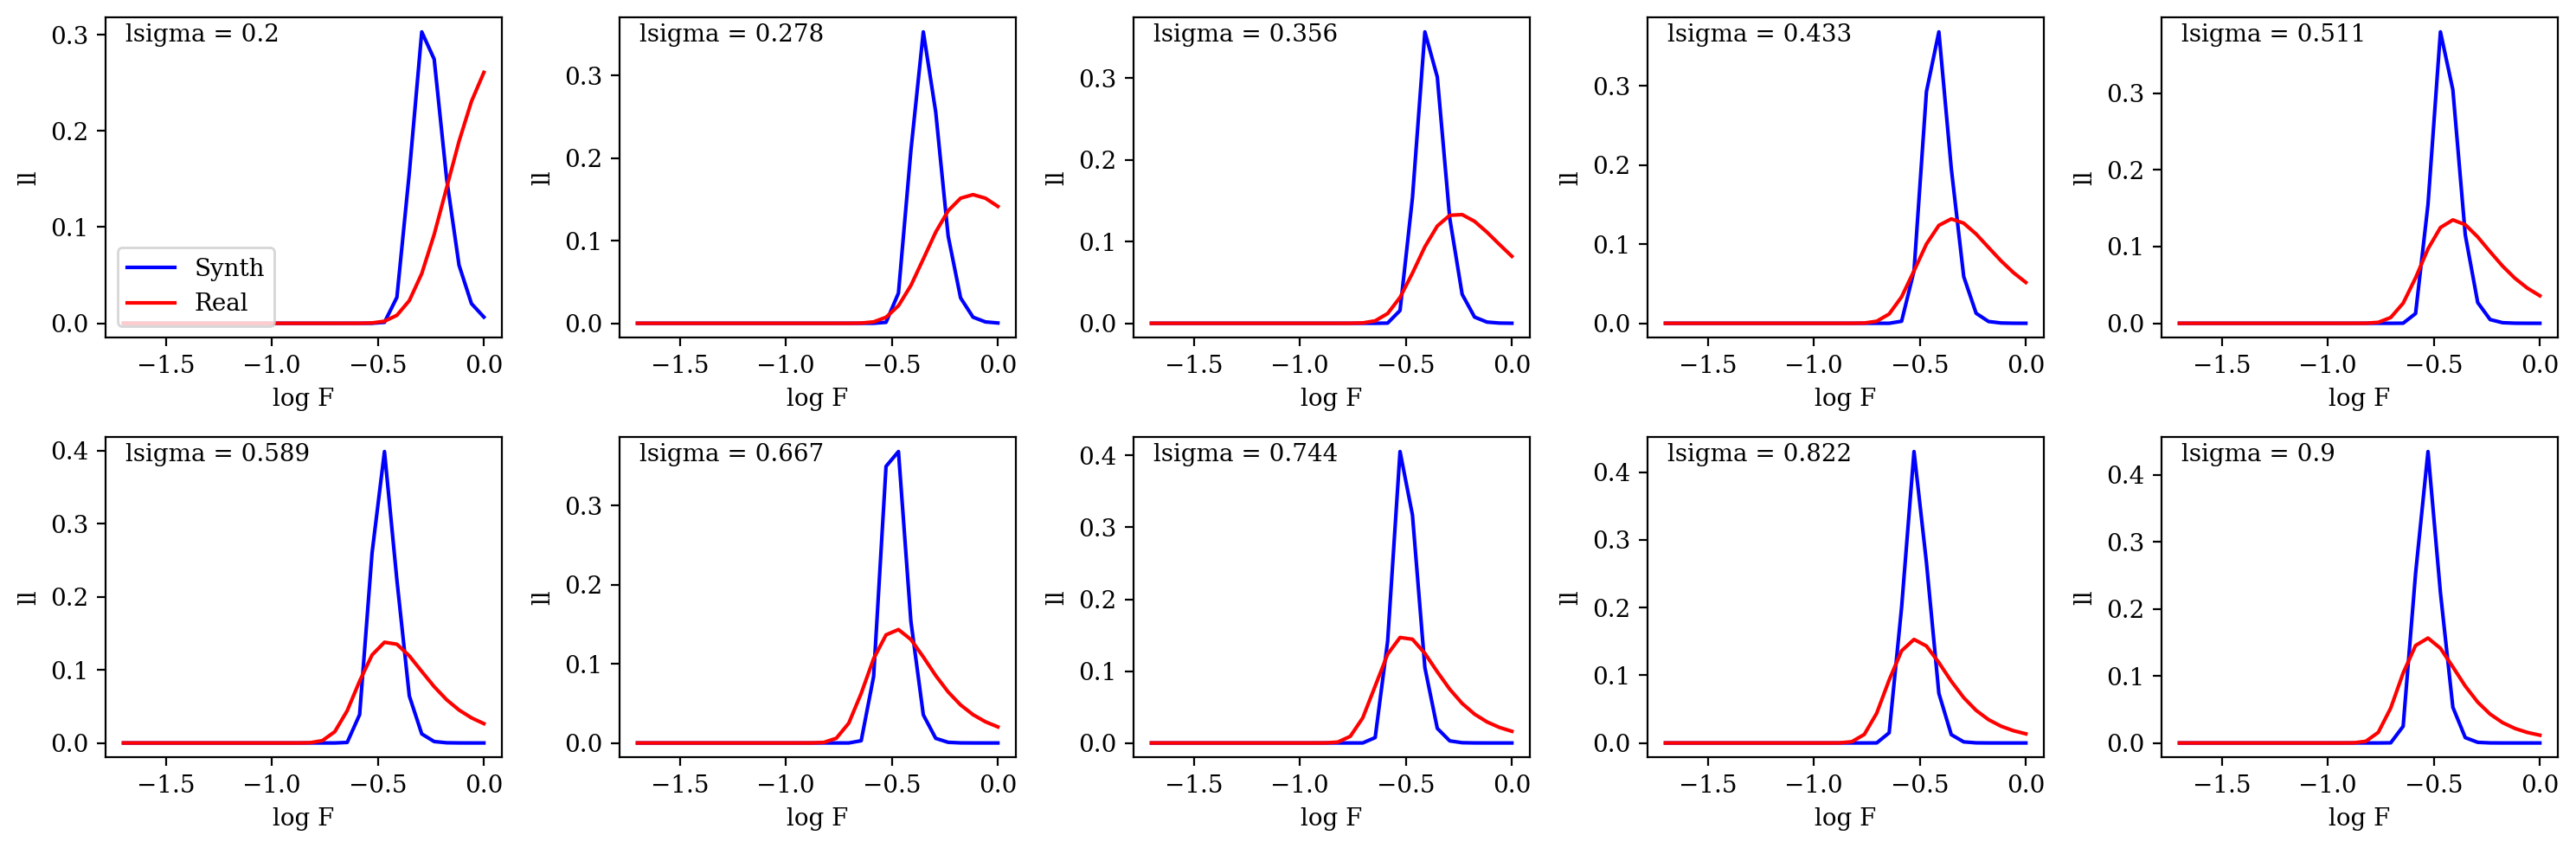

In [44]:
sigmas = cube["lsigma"]

fig, ax = plt.subplots(2, 5, dpi=200, figsize=(15,5))

for sigma, a in zip(sigmas, ax.flatten()):
  ll = ac.get_slice_from_parameters(cube, ["H0", "lmean", "lsigma"], [H0_diag, 2.16, sigma], wanted="ll")
  ll[np.isnan(ll)] = -1e99
  ll -= np.max(ll)
  ll = 10**ll
  ll /= np.sum(ll)

  ll_real = ac.get_slice_from_parameters(cube_real, ["H0", "lmean", "lsigma"], [H0_diag, 2.16, sigma], wanted="ll")
  ll_real[np.isnan(ll_real)] = -1e99
  ll_real -= np.max(ll_real)
  ll_real = 10**ll_real
  ll_real /= np.sum(ll_real)

  a.plot(cube["logF"], ll, c="b", label="Synth")
  a.plot(cube["logF"], ll_real, c="r", label="Real")
  
  a.set_xlabel("log F")
  a.set_ylabel("ll")
  a.text(.05, .925,f"lsigma = {np.round(sigma,3)}", transform=a.transAxes)

  if sigma == sigmas[0]:
    a.legend(loc="lower left")

fig.tight_layout()
plt.show()

## looking at the csvs

In [8]:
import pandas as pd

In [14]:
data = pd.read_csv("Cloud/Output/craco_real1.csv")
data.iloc[np.where(np.isnan(data.lls))[0]]

,n,H0,lmean,lsigma,logF,lC,lls0,P_zDM0,P_n0,P_s0,...,P_s4,N4,lls,P_zDM,P_n,P_s,p_zgDM,p_DM,p_DMgz,p_z
0,0,60.0,1.700000,0.2,-1.700000,2.456513,-134.394551,-70.357285,-1.853316,-62.183950,...,-26.397806,10.180513,NaN,NaN,-6.090108,NaN,-187.749683,-49.185471,-196.051978,-40.883176
1,1,60.0,1.788889,0.2,-1.700000,2.462555,-134.012797,-69.955299,-1.842434,-62.215065,...,-26.386291,10.298515,NaN,NaN,-6.052567,NaN,-187.669472,-48.765729,-195.540811,-40.894389
2,2,60.0,1.877778,0.2,-1.700000,2.469962,-133.393881,-69.480142,-1.829745,-62.083995,...,-26.380663,10.444831,NaN,NaN,-6.009194,NaN,-189.092284,-48.314681,-196.499311,-40.907654
3,3,60.0,1.966667,0.2,-1.700000,2.479020,-132.532865,-68.882953,-1.815107,-61.834805,...,-26.385555,10.626289,NaN,NaN,-5.959927,NaN,-191.998570,-47.863189,-198.938411,-40.923348
4,4,60.0,2.055556,0.2,-1.700000,2.490068,-131.628873,-68.107472,-1.798427,-61.722975,...,-26.405387,10.851302,NaN,NaN,-5.905188,NaN,-196.336365,-47.466887,-202.861297,-40.941955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,60.0,2.144444,0.9,-1.641379,2.559047,-122.308070,-58.985920,-1.786467,-61.535683,...,-27.017369,11.890488,NaN,NaN,-5.832471,NaN,-129.615458,-47.386735,-135.961392,-41.040801
196,196,60.0,2.233333,0.9,-1.641379,2.572950,-122.164846,-58.784947,-1.777098,-61.602800,...,-27.066007,12.134648,NaN,NaN,-5.809361,NaN,-129.924303,-47.349979,-136.208378,-41.065904
197,197,60.0,2.322222,0.9,-1.641379,2.587770,-122.065556,-58.630081,-1.767387,-61.668088,...,-27.114783,12.397606,NaN,NaN,-5.788472,NaN,-130.258823,-47.339223,-136.504447,-41.093599
198,198,60.0,2.411111,0.9,-1.641379,2.603483,-122.010871,-58.522005,-1.757360,-61.731506,...,-27.163402,12.679704,NaN,NaN,-5.770397,NaN,-130.617252,-47.355577,-136.848784,-41.124045


In [21]:
data = pd.read_csv("Cloud/Output/craco_real2.csv")
data.iloc[np.where(np.isnan(data.lls))[0]]

,n,H0,lmean,lsigma,logF,lC,lls0,P_zDM0,P_n0,P_s0,...,P_s4,N4,lls,P_zDM,P_n,P_s,p_zgDM,p_DM,p_DMgz,p_z
0,3000,61.0,1.700000,0.2,-1.700000,2.456119,-134.361007,-70.314131,-1.852750,-62.194126,...,-26.409137,10.135104,NaN,NaN,-6.093265,NaN,-173.960800,-49.178061,-182.368963,-40.769898
1,3001,61.0,1.788889,0.2,-1.700000,2.462146,-133.980656,-69.915665,-1.841901,-62.223089,...,-26.397414,10.252354,NaN,NaN,-6.055560,NaN,-173.493922,-48.758558,-181.472093,-40.780387
2,3002,61.0,1.877778,0.2,-1.700000,2.469533,-133.363349,-69.445574,-1.829250,-62.088525,...,-26.391494,10.397743,NaN,NaN,-6.011973,NaN,-174.522314,-48.307544,-182.037088,-40.792770
3,3003,61.0,1.966667,0.2,-1.700000,2.478569,-132.506835,-68.855895,-1.814655,-61.836284,...,-26.396009,10.578060,NaN,NaN,-5.962424,NaN,-177.021467,-47.855724,-184.069796,-40.807395
4,3004,61.0,2.055556,0.2,-1.700000,2.489590,-131.610451,-68.091086,-1.798024,-61.721341,...,-26.415383,10.801669,NaN,NaN,-5.907315,NaN,-180.938682,-47.458513,-187.572490,-40.824705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3195,61.0,2.144444,0.9,-1.641379,2.558557,-122.300987,-58.979308,-1.786020,-61.535659,...,-27.028148,11.838436,NaN,NaN,-5.832236,NaN,-120.280808,-47.391145,-126.753143,-40.918810
196,3196,61.0,2.233333,0.9,-1.641379,2.572447,-122.158082,-58.778572,-1.776670,-61.602840,...,-27.076643,12.081667,NaN,NaN,-5.808666,NaN,-120.565516,-47.354208,-126.977094,-40.942630
197,3197,61.0,2.322222,0.9,-1.641379,2.587255,-122.059050,-58.623884,-1.766978,-61.668189,...,-27.125259,12.343646,NaN,NaN,-5.787282,NaN,-120.875713,-47.343250,-127.250028,-40.968935
198,3198,61.0,2.411111,0.9,-1.641379,2.602956,-122.004568,-58.515934,-1.756970,-61.731664,...,-27.173704,12.624716,NaN,NaN,-5.768678,NaN,-121.209641,-47.359388,-127.571149,-40.997880


In [39]:
data[150:160]

,n,H0,lmean,lsigma,logF,lC,lls0,P_zDM0,P_n0,P_s0,...,P_s4,N4,lls,P_zDM,P_n,P_s,p_zgDM,p_DM,p_DMgz,p_z
150,150,60.0,1.700000,0.588889,-1.641379,2.477835,-124.372117,-61.415263,-1.836145,-61.120709,...,-26.576688,10.564874,NaN,NaN,-6.010411,NaN,-130.552262,-48.037972,-137.681370,-40.908864
151,151,60.0,1.788889,0.588889,-1.641379,2.486885,-123.636945,-60.558277,-1.826085,-61.252583,...,-26.621327,10.734395,NaN,NaN,-5.973447,NaN,-131.027248,-47.699353,-137.803367,-40.923234
152,152,60.0,1.877778,0.588889,-1.641379,2.497333,-123.000050,-59.801841,-1.815199,-61.383011,...,-26.674749,10.931121,NaN,NaN,-5.934652,NaN,-131.633701,-47.394558,-138.088437,-40.939822
153,153,60.0,1.966667,0.588889,-1.641379,2.509317,-122.472998,-59.159431,-1.803515,-61.510052,...,-26.736668,11.158327,NaN,NaN,-5.894812,NaN,-132.355703,-47.136197,-138.532990,-40.958910
154,154,60.0,2.055556,0.588889,-1.641379,2.522979,-122.064971,-58.641450,-1.791067,-61.632454,...,-26.806292,11.419534,NaN,NaN,-5.854956,NaN,-133.178236,-46.935526,-139.132922,-40.980840
155,155,60.0,2.144444,0.588889,-1.641379,2.538452,-121.783109,-58.255720,-1.777898,-61.749490,...,-26.882364,11.718473,NaN,NaN,-5.816382,NaN,-134.087496,-46.802377,-139.883857,-41.006015
156,156,60.0,2.233333,0.588889,-1.641379,2.555862,-121.632824,-58.007946,-1.764053,-61.860826,...,-26.963274,12.059038,NaN,NaN,-5.780681,NaN,-135.071073,-46.745161,-140.781312,-41.034922
157,157,60.0,2.322222,0.588889,-1.641379,2.575314,-121.618098,-57.902120,-1.749581,-61.966397,...,-27.047233,12.445217,NaN,NaN,-5.749740,NaN,-136.118010,-46.770919,-141.820803,-41.068127
158,158,60.0,2.411111,0.588889,-1.641379,2.596894,-121.741719,-57.940858,-1.734534,-62.066327,...,-27.132476,12.880997,NaN,NaN,-5.725739,NaN,-137.218793,-46.885404,-142.997906,-41.106292
159,159,60.0,2.500000,0.588889,-1.641379,2.620651,-122.005490,-58.125667,-1.718966,-62.160858,...,-27.217432,13.370258,NaN,NaN,-5.711129,NaN,-138.365281,-47.093176,-144.308289,-41.150168
